In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
from sklearn import svm
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import log_loss

Loading the data set

In [4]:
train = pd.read_csv('/content/newmini.csv')

In [5]:
train.shape

(1499, 7501)

In [6]:
train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,7461,7462,7463,7464,7465,7466,7467,7468,7469,7470,7471,7472,7473,7474,7475,7476,7477,7478,7479,7480,7481,7482,7483,7484,7485,7486,7487,7488,7489,7490,7491,7492,7493,7494,7495,7496,7497,7498,7499,7500
0,165,179,185,165,179,185,163,178,183,162,176,182,161,175,178,161,174,177,161,173,177,159,172,175,160,170,174,161,168,171,160,168,171,158,166,169,153,160,163,154,...,41.0,44.0,51.0,40.0,43.0,50.0,40.0,43.0,50.0,40.0,43.0,50.0,40.0,43.0,50.0,40.0,43.0,50.0,42.0,45.0,52.0,41.0,44.0,51.0,40.0,43.0,50.0,40.0,43.0,50.0,40.0,43.0,50.0,40.0,43.0,50.0,41.0,44.0,51.0,1
1,246,246,246,241,242,241,210,212,211,250,249,249,254,254,254,249,249,249,242,239,238,200,196,199,115,110,113,126,121,121,131,127,125,129,125,123,187,184,185,255,...,73.0,89.0,97.0,86.0,95.0,102.0,78.0,83.0,86.0,79.0,84.0,94.0,93.0,99.0,111.0,107.0,121.0,133.0,100.0,109.0,118.0,111.0,119.0,126.0,115.0,121.0,133.0,117.0,125.0,137.0,117.0,123.0,135.0,105.0,109.0,120.0,109.0,114.0,124.0,1
2,255,255,255,238,239,237,215,220,219,214,220,218,244,247,246,255,255,255,254,254,254,254,255,253,248,255,252,252,253,254,255,253,248,252,249,244,252,239,234,253,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,1
3,87,86,92,89,89,95,94,91,97,99,92,100,100,93,101,102,95,103,104,97,105,106,99,107,107,100,108,108,101,109,109,102,110,110,103,111,112,105,113,113,...,196.0,218.0,226.0,201.0,219.0,226.0,136.0,142.0,146.0,98.0,97.0,103.0,101.0,100.0,106.0,96.0,95.0,101.0,93.0,92.0,98.0,89.0,88.0,94.0,86.0,85.0,91.0,83.0,82.0,88.0,80.0,79.0,85.0,76.0,76.0,84.0,71.0,71.0,79.0,1
4,50,37,29,48,37,30,47,36,33,46,34,34,46,33,36,39,30,33,34,30,33,29,34,34,24,31,28,24,26,24,21,22,21,18,18,16,17,16,13,19,...,26.0,14.0,21.0,21.0,10.0,15.0,17.0,9.0,12.0,11.0,8.0,9.0,6.0,6.0,5.0,8.0,10.0,9.0,5.0,10.0,8.0,5.0,8.0,7.0,9.0,9.0,10.0,11.0,7.0,9.0,13.0,4.0,5.0,17.0,2.0,3.0,22.0,3.0,4.0,1


In [7]:
train.isnull().sum()

0       0
1       0
2       0
3       0
4       0
       ..
7496    0
7497    0
7498    0
7499    0
7500    0
Length: 7501, dtype: int64

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1499 entries, 0 to 1498
Columns: 7501 entries, 0 to 7500
dtypes: float64(5000), int64(2501)
memory usage: 85.8 MB


In [9]:
train.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,7461,7462,7463,7464,7465,7466,7467,7468,7469,7470,7471,7472,7473,7474,7475,7476,7477,7478,7479,7480,7481,7482,7483,7484,7485,7486,7487,7488,7489,7490,7491,7492,7493,7494,7495,7496,7497,7498,7499,7500
count,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,...,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000
mean,146.086724,141.448966,138.305537,144.162108,139.322882,135.985991,142.915277,138.033356,134.627085,141.551034,136.430287,132.781855,140.698466,135.296197,131.601067,140.421614,134.791861,131.222148,140.974650,135.004670,131.390260,141.496998,135.235490,131.574383,141.082722,134.620414,130.820547,140.860574,134.250167,130.539693,140.536358,133.599066,129.778519,140.036691,132.835223,129.039360,140.103402,132.627085,128.711141,140.432288,...,129.775851,116.585057,114.000000,129.246164,116.056037,113.641761,128.378252,115.077385,112.571047,128.085390,115.114743,112.480987,127.852568,115.519680,112.999333,127.773182,115.855904,113.603069,127.448966,115.814543,113.661107,128.173449,116.901935,114.787859,129.611074,118.649099,116.501001,131.140761,120.331554,117.797865,131.388259,121.226818,118.991328,132.201468,122.931288,121.008005,134.703135,125.998666,124.320881,0.488993
std,88.063072,89.294015,90.153822,88.080887,89.290759,89.948920,88.389432,89.459153,90.018024,88.327626,89.428438,89.909410,88.419265,89.606194,90.104958,88.001007,89.311732,89.790117,87.761682,89.057762,89.380103,88.063140,89.177595,89.333710,87.593870,88.873130,89.074123,87.228855,88.744060,89.089469,87.335460,88.976843,89.395322,87.578883,89.233333,89.628862,87.281618,88.964967,89.540288,87.093177,...,84.191762,80.749559,80.181395,85.068119,81.609033,80.817075,85.056678,81.486847,80.655845,85.464501,82.084599,81.176793,86.054926,83.237247,82.324470,86.747654,84.099212,83.270478,87.219185,84.717068,83.917349,87.644365,85.173523,84.216916,87.529237,85.483473,84.355211,87.611189,85.817642,84.813389,87.450417,85.818461,84.993061,87.970043,86.440615,85.968417,88.774316,87.541011,87.091065,0.500046
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,62.000000,55.000000,50.000000,59.500000,52.000000,48.000000,57.000000,48.000000,47.000000,57.000000,49.000000,47.000000,55.000000,48.000000,46.500000,54.500000,49.000000,46.500000,57.000000,48.000000,46.500000,58.000000,49.500000,48.000000,57.000000,49.000000,47.000000,57.000000,49.000000

Plotting the count of target variable

In [10]:
train['7500'].unique()

array([1, 0])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


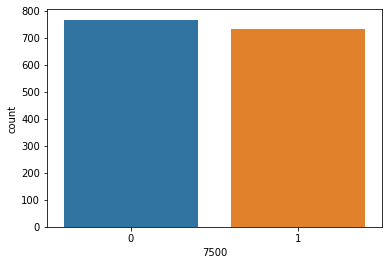

In [11]:
train['7500'].value_counts()
sns.countplot(train['7500'])
plt.show()

Finding correlation between features

Seperating the input and output dataset

In [12]:
x = train.iloc[:,0:7500]
x.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,7460,7461,7462,7463,7464,7465,7466,7467,7468,7469,7470,7471,7472,7473,7474,7475,7476,7477,7478,7479,7480,7481,7482,7483,7484,7485,7486,7487,7488,7489,7490,7491,7492,7493,7494,7495,7496,7497,7498,7499
0,165,179,185,165,179,185,163,178,183,162,176,182,161,175,178,161,174,177,161,173,177,159,172,175,160,170,174,161,168,171,160,168,171,158,166,169,153,160,163,154,...,52.0,41.0,44.0,51.0,40.0,43.0,50.0,40.0,43.0,50.0,40.0,43.0,50.0,40.0,43.0,50.0,40.0,43.0,50.0,42.0,45.0,52.0,41.0,44.0,51.0,40.0,43.0,50.0,40.0,43.0,50.0,40.0,43.0,50.0,40.0,43.0,50.0,41.0,44.0,51.0
1,246,246,246,241,242,241,210,212,211,250,249,249,254,254,254,249,249,249,242,239,238,200,196,199,115,110,113,126,121,121,131,127,125,129,125,123,187,184,185,255,...,75.0,73.0,89.0,97.0,86.0,95.0,102.0,78.0,83.0,86.0,79.0,84.0,94.0,93.0,99.0,111.0,107.0,121.0,133.0,100.0,109.0,118.0,111.0,119.0,126.0,115.0,121.0,133.0,117.0,125.0,137.0,117.0,123.0,135.0,105.0,109.0,120.0,109.0,114.0,124.0
2,255,255,255,238,239,237,215,220,219,214,220,218,244,247,246,255,255,255,254,254,254,254,255,253,248,255,252,252,253,254,255,253,248,252,249,244,252,239,234,253,...,254.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0
3,87,86,92,89,89,95,94,91,97,99,92,100,100,93,101,102,95,103,104,97,105,106,99,107,107,100,108,108,101,109,109,102,110,110,103,111,112,105,113,113,...,234.0,196.0,218.0,226.0,201.0,219.0,226.0,136.0,142.0,146.0,98.0,97.0,103.0,101.0,100.0,106.0,96.0,95.0,101.0,93.0,92.0,98.0,89.0,88.0,94.0,86.0,85.0,91.0,83.0,82.0,88.0,80.0,79.0,85.0,76.0,76.0,84.0,71.0,71.0,79.0
4,50,37,29,48,37,30,47,36,33,46,34,34,46,33,36,39,30,33,34,30,33,29,34,34,24,31,28,24,26,24,21,22,21,18,18,16,17,16,13,19,...,25.0,26.0,14.0,21.0,21.0,10.0,15.0,17.0,9.0,12.0,11.0,8.0,9.0,6.0,6.0,5.0,8.0,10.0,9.0,5.0,10.0,8.0,5.0,8.0,7.0,9.0,9.0,10.0,11.0,7.0,9.0,13.0,4.0,5.0,17.0,2.0,3.0,22.0,3.0,4.0


In [13]:
y = train.iloc[:,7500]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: 7500, dtype: int64

Normalizing the data by mean subtraction followed by standard deviation division.

In [14]:
sc = StandardScaler()
x = sc.fit_transform(x.values)
y = y.values

Spiliting the train-test dataset

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5)

fitting the model without using feature selection

For model 2

In [17]:
clf = svm.SVC(gamma = 'auto',probability = True)
clf.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [18]:
y_pred = clf.predict(x_test)
accuracy = metrics.accuracy_score(y_test,y_pred)
accuracy

0.8613333333333333

In [19]:
y_pred_proba = clf.predict_proba(x_test)

In [20]:
cm1 = confusion_matrix(y_test, y_pred)
cm1

array([[326,  70],
       [ 34, 320]])

Text(69.0, 0.5, 'Truth')

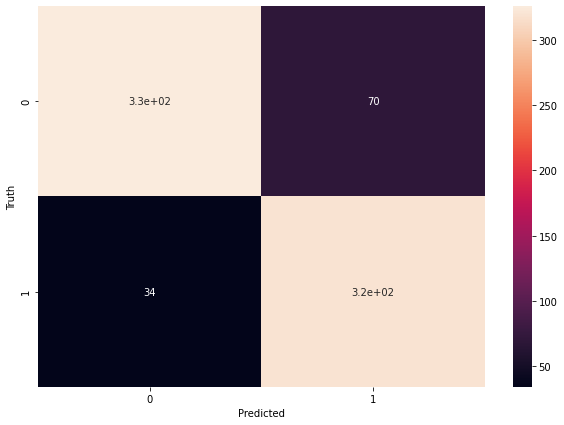

In [22]:
plt.figure(figsize=(10,7))
sns.heatmap(cm1, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [23]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.82      0.86       396
           1       0.82      0.90      0.86       354

    accuracy                           0.86       750
   macro avg       0.86      0.86      0.86       750
weighted avg       0.87      0.86      0.86       750



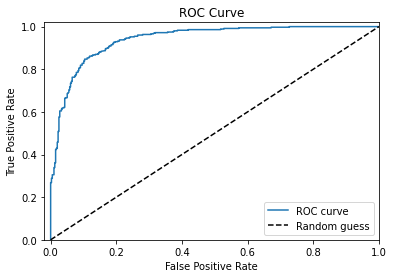

In [24]:
fpr, tpr, thresholds = roc_curve(y_test,y_pred_proba[:,1])
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.xlim([-0.02, 1])
plt.ylim([0, 1.02])
plt.legend(loc="lower right")

In [25]:
log_loss(y_test,y_pred_proba)

0.31027748718179193

using cross validation

In [26]:
print(cross_val_score(clf, x, y, cv=5))

[0.87666667 0.89       0.85       0.89       0.88628763]


fitting the model2 using feature selection

In [40]:
x_train_std = sc.fit_transform(x_train)
x_test_std = sc.fit_transform(x_test)

In [53]:
pca = PCA(0.9999999999)
x_train_p = pca.fit_transform(x_train_std) 
x_test_p = pca.transform(x_test_std)

In [54]:
print(x_train_p.shape)
print(x_train_std.shape)

(749, 745)
(749, 7500)


In [55]:
model = svm.SVC(gamma = 'auto',probability = True)
model.fit(x_train_p,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [56]:
prediction = model.predict(x_test_p)
acc_score_pca = metrics.accuracy_score(prediction,y_test)
acc_score_pca

0.632

In [57]:
prediction_proba = model.predict_proba(x_test_p)

In [58]:
cm2 = confusion_matrix(y_test, prediction)
cm2

array([[123, 273],
       [  3, 351]])

Text(69.0, 0.5, 'Truth')

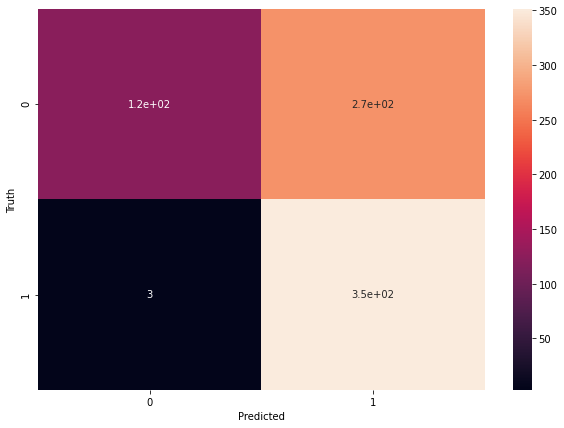

In [59]:
plt.figure(figsize=(10,7))
sns.heatmap(cm2, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [60]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.98      0.31      0.47       396
           1       0.56      0.99      0.72       354

    accuracy                           0.63       750
   macro avg       0.77      0.65      0.59       750
weighted avg       0.78      0.63      0.59       750



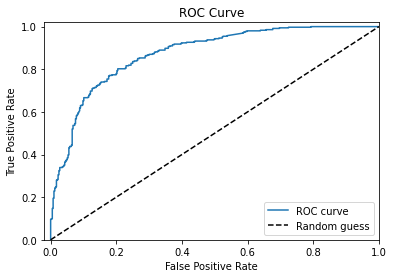

In [61]:
fpr, tpr, thresholds = roc_curve(y_test,prediction_proba[:,1])
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.xlim([-0.02, 1])
plt.ylim([0, 1.02])
plt.legend(loc="lower right")

In [62]:
log_loss(y_test,prediction_proba)

0.5633087644031788

using cross validation

In [73]:
print(cross_val_score(model, x_train_p, y_train, cv=5))

[0.62       0.64       0.68666667 0.62       0.62416107]


# MLP MODEL 

fitting the model3 without feature selection

For model3

In [64]:
clf3 = MLPClassifier()
clf3.fit(x_train,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [65]:
y_pred = clf3.predict(x_test)
accuracy = metrics.accuracy_score(y_test,y_pred)
accuracy

0.8706666666666667

In [66]:
y_pred_proba = clf3.predict_proba(x_test)

In [67]:
cm3 = confusion_matrix(y_test, y_pred)
cm3

array([[335,  61],
       [ 36, 318]])

Text(69.0, 0.5, 'Truth')

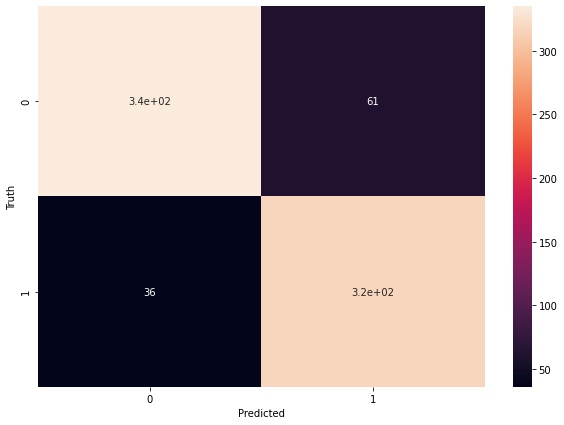

In [68]:
plt.figure(figsize=(10,7))
sns.heatmap(cm3, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [69]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.85      0.87       396
           1       0.84      0.90      0.87       354

    accuracy                           0.87       750
   macro avg       0.87      0.87      0.87       750
weighted avg       0.87      0.87      0.87       750



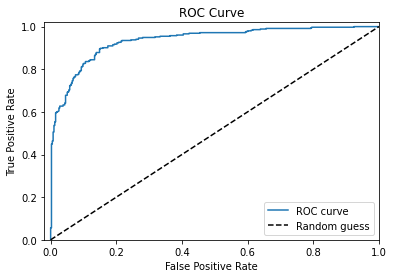

In [70]:
fpr, tpr, thresholds = roc_curve(y_test,y_pred_proba[:,1])
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.xlim([-0.02, 1])
plt.ylim([0, 1.02])
plt.legend(loc="lower right")

In [71]:
log_loss(y_test,y_pred_proba)

0.6217681674686503

Using cross validation

In [74]:
print(cross_val_score(clf3, x, y, cv=5))

[0.87333333 0.89666667 0.87333333 0.88666667 0.88628763]


fitting the model3 using feature selection

In [75]:
pca = PCA(0.9999999999)
x_train_p = pca.fit_transform(x_train_std) 
x_test_p = pca.transform(x_test_std)

In [76]:
print(x_train_p.shape)
print(x_train_std.shape)

(749, 745)
(749, 7500)


In [77]:
model4 = MLPClassifier()
model4.fit(x_train_p,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [78]:
prediction = model4.predict(x_test_p)
acc_score_pca = metrics.accuracy_score(prediction,y_test)
acc_score_pca

0.8373333333333334

In [79]:
prediction_proba = model4.predict_proba(x_test_p)

In [80]:
cm4 = confusion_matrix(y_test, prediction)
cm4

array([[324,  72],
       [ 50, 304]])

Text(69.0, 0.5, 'Truth')

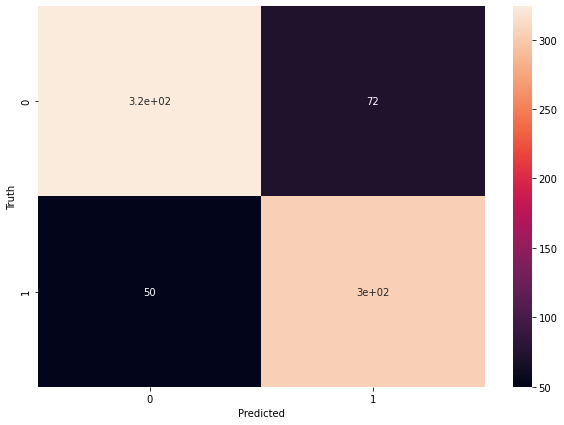

In [81]:
plt.figure(figsize=(10,7))
sns.heatmap(cm4, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [82]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.87      0.82      0.84       396
           1       0.81      0.86      0.83       354

    accuracy                           0.84       750
   macro avg       0.84      0.84      0.84       750
weighted avg       0.84      0.84      0.84       750



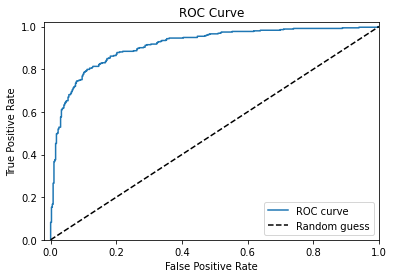

In [83]:
fpr, tpr, thresholds = roc_curve(y_test,prediction_proba[:,1])
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.xlim([-0.02, 1])
plt.ylim([0, 1.02])
plt.legend(loc="lower right")

In [84]:
log_loss(y_test,prediction_proba)

0.48975080326009085

Cross validation

In [85]:
print(cross_val_score(model4, x_train_p, y_train, cv=5))

[0.79333333 0.81333333 0.81333333 0.81333333 0.77852349]
